# Práctica FIFA

Autor: Luis Clar Fiol

## Import libraries

Importes de las librerías necesarias.

In [1]:
import os

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

## Leemos el fichero CSV

Para leerlo usaremos ``pandas`` y la utilidad de
``os``.

In [2]:
df = pd.read_csv(os.path.join("../in/fifa.csv"))

Vamos a mostrar el número máximo de columnas.

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Vemos que hay muchas columnas, una parte de estas las podemos eliminar, ya que el objetivo de la práctica es tener un dataset que se ajuste bien al modelo, y así predecir sobre el valor de un jugador en función de sus características.

Por lo tanto vemos que hay columnas que no aportan nada de información, como la foto del jugador, la bandera de su país, el tipo de cuerpo, su numero de camiseta, etc.

Pero también hay columnas que nos dan información de la media de cada jugador en las posibles posiciones, esto no nos aporta nada de valor ya que el valor de un delantero no lo podemos medir si su media como defensor es muy baja, que de hecho siempre es así ya que un delantero es el atacante principal, entonces no tiene sentido valorar a jugadores en otras posiciones donde serán peores ya que no es su posición principal, y así también nos quitamos un problema con los porteros, que estos tienen valores NaN en esas columnas, pues los porteros es evidente que jugarán en su posición, y sus "stats" son distintas a la de los otros jugadores.

In [4]:
df.drop(df.iloc[:, 28:54], inplace = True, axis = 1) 

In [5]:
del df['Photo']
del df['Flag']
del df['Club Logo']
del df['Body Type']
del df['Real Face']
del df['Jersey Number']
del df['Work Rate']
del df['Joined']
del df['Contract Valid Until']
del df['Loaned From']
del df['Unnamed: 0']
del df['ID']
del df['Release Clause']
del df['Name']
df.head()

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,RF,5'7,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,ST,6'2,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,LW,5'9,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,GK,6'4,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,RCM,5'11,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


Aquí vamos a coger de todo el dataset, aquellos jugadores que contengan NaN en  algúna columna.

In [6]:
df[df.isna().any(axis=1)]

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
452,24,Argentina,80,85,NaN,€0,€0,2122,Right,2.0,4.0,4.0,CM,5'11,165lbs,76.0,55.0,60.0,84.0,73.0,78.0,79.0,78.0,82.0,82.0,75.0,69.0,77.0,74.0,77.0,82.0,61.0,79.0,69.0,80.0,79.0,72.0,74.0,82.0,57.0,74.0,73.0,75.0,72.0,9.0,14.0,6.0,9.0,10.0
538,33,Sweden,80,80,NaN,€0,€0,1797,Right,2.0,4.0,2.0,LCB,6'4,185lbs,49.0,51.0,81.0,73.0,37.0,49.0,36.0,40.0,67.0,63.0,46.0,49.0,55.0,76.0,36.0,74.0,64.0,67.0,83.0,59.0,81.0,82.0,54.0,49.0,79.0,78.0,82.0,83.0,79.0,7.0,9.0,12.0,10.0,15.0
568,26,Russia,79,81,NaN,€0,€0,1217,Right,1.0,3.0,1.0,GK,6'2,176lbs,16.0,14.0,17.0,25.0,13.0,15.0,18.0,17.0,32.0,17.0,58.0,54.0,36.0,76.0,50.0,24.0,60.0,27.0,70.0,13.0,26.0,20.0,11.0,63.0,15.0,69.0,18.0,20.0,12.0,80.0,73.0,65.0,77.0,85.0
677,29,Russia,79,79,NaN,€0,€0,2038,Right,2.0,3.0,3.0,RB,5'10,154lbs,73.0,61.0,69.0,79.0,57.0,72.0,49.0,46.0,75.0,72.0,84.0,90.0,80.0,75.0,76.0,67.0,85.0,93.0,68.0,57.0,65.0,71.0,77.0,72.0,41.0,73.0,76.0,76.0,80.0,7.0,12.0,10.0,8.0,15.0
874,29,Russia,78,78,NaN,€0,€0,1810,Right,2.0,3.0,3.0,ST,6'5,201lbs,61.0,79.0,86.0,71.0,74.0,71.0,64.0,60.0,55.0,77.0,66.0,65.0,50.0,75.0,32.0,78.0,63.0,77.0,93.0,68.0,75.0,30.0,78.0,73.0,77.0,70.0,21.0,15.0,19.0,15.0,12.0,11.0,11.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17197,21,India,55,64,NaN,€0,€0,838,Right,1.0,2.0,1.0,GK,6'2,176lbs,13.0,7.0,13.0,16.0,7.0,11.0,10.0,13.0,16.0,18.0,29.0,32.0,24.0,55.0,36.0,24.0,47.0,16.0,56.0,9.0,21.0,10.0,8.0,29.0,13.0,29.0,8.0,12.0,11.0,55.0,50.0,57.0,59.0,53.0
17215,26,Finland,55,57,NaN,€0,€0,1366,Right,1.0,3.0,2.0,RB,6'4,187lbs,42.0,41.0,65.0,45.0,26.0,50.0,30.0,32.0,35.0,40.0,65.0,55.0,58.0,49.0,42.0,29.0,61.0,56.0,76.0,26.0,48.0,54.0,46.0,36.0,33.0,36.0,51.0,58.0,64.0,11.0,9.0,9.0,12.0,12.0
17339,23,India,54,63,NaN,€0,€0,1321,Right,1.0,3.0,2.0,NaN,5'9,143lbs,35.0,56.0,49.0,38.0,38.0,53.0,37.0,33.0,33.0,43.0,66.0,68.0,57.0,49.0,58.0,50.0,55.0,59.0,62.0,47.0,39.0,34.0,57.0,43.0,58.0,45.0,14.0,23.0,21.0,8.0,6.0,13.0,9.0,10.0
17436,20,India,54,67,NaN,€0,€0,1270,Right,1.0,3.0,2.0,NaN,6'0,168lbs,25.0,65.0,48.0,38.0,48.0,47.0,33.0,30.0,31.0,52.0,53.0,58.0,59.0,51.0,59.0,51.0,65.0,50.0,58.0,50.0,33.0,18.0,48.0,40.0,55.0,46.0,26.0,17.0,13.0,7.0,8.0,12.0,11.0,11.0


Vemos que hay jugadores que tienen NaN en su club, esto significa que no pertenecen a ningúno, esto también nos dice que si no pertenecen a ningún club, no estará dentro del mercado de fichajes, asi que los podemos descartar directamente.

In [7]:
df.loc[df.Club != df.Club]

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
452,24,Argentina,80,85,NaN,€0,€0,2122,Right,2.0,4.0,4.0,CM,5'11,165lbs,76.0,55.0,60.0,84.0,73.0,78.0,79.0,78.0,82.0,82.0,75.0,69.0,77.0,74.0,77.0,82.0,61.0,79.0,69.0,80.0,79.0,72.0,74.0,82.0,57.0,74.0,73.0,75.0,72.0,9.0,14.0,6.0,9.0,10.0
538,33,Sweden,80,80,NaN,€0,€0,1797,Right,2.0,4.0,2.0,LCB,6'4,185lbs,49.0,51.0,81.0,73.0,37.0,49.0,36.0,40.0,67.0,63.0,46.0,49.0,55.0,76.0,36.0,74.0,64.0,67.0,83.0,59.0,81.0,82.0,54.0,49.0,79.0,78.0,82.0,83.0,79.0,7.0,9.0,12.0,10.0,15.0
568,26,Russia,79,81,NaN,€0,€0,1217,Right,1.0,3.0,1.0,GK,6'2,176lbs,16.0,14.0,17.0,25.0,13.0,15.0,18.0,17.0,32.0,17.0,58.0,54.0,36.0,76.0,50.0,24.0,60.0,27.0,70.0,13.0,26.0,20.0,11.0,63.0,15.0,69.0,18.0,20.0,12.0,80.0,73.0,65.0,77.0,85.0
677,29,Russia,79,79,NaN,€0,€0,2038,Right,2.0,3.0,3.0,RB,5'10,154lbs,73.0,61.0,69.0,79.0,57.0,72.0,49.0,46.0,75.0,72.0,84.0,90.0,80.0,75.0,76.0,67.0,85.0,93.0,68.0,57.0,65.0,71.0,77.0,72.0,41.0,73.0,76.0,76.0,80.0,7.0,12.0,10.0,8.0,15.0
874,29,Russia,78,78,NaN,€0,€0,1810,Right,2.0,3.0,3.0,ST,6'5,201lbs,61.0,79.0,86.0,71.0,74.0,71.0,64.0,60.0,55.0,77.0,66.0,65.0,50.0,75.0,32.0,78.0,63.0,77.0,93.0,68.0,75.0,30.0,78.0,73.0,77.0,70.0,21.0,15.0,19.0,15.0,12.0,11.0,11.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17197,21,India,55,64,NaN,€0,€0,838,Right,1.0,2.0,1.0,GK,6'2,176lbs,13.0,7.0,13.0,16.0,7.0,11.0,10.0,13.0,16.0,18.0,29.0,32.0,24.0,55.0,36.0,24.0,47.0,16.0,56.0,9.0,21.0,10.0,8.0,29.0,13.0,29.0,8.0,12.0,11.0,55.0,50.0,57.0,59.0,53.0
17215,26,Finland,55,57,NaN,€0,€0,1366,Right,1.0,3.0,2.0,RB,6'4,187lbs,42.0,41.0,65.0,45.0,26.0,50.0,30.0,32.0,35.0,40.0,65.0,55.0,58.0,49.0,42.0,29.0,61.0,56.0,76.0,26.0,48.0,54.0,46.0,36.0,33.0,36.0,51.0,58.0,64.0,11.0,9.0,9.0,12.0,12.0
17339,23,India,54,63,NaN,€0,€0,1321,Right,1.0,3.0,2.0,NaN,5'9,143lbs,35.0,56.0,49.0,38.0,38.0,53.0,37.0,33.0,33.0,43.0,66.0,68.0,57.0,49.0,58.0,50.0,55.0,59.0,62.0,47.0,39.0,34.0,57.0,43.0,58.0,45.0,14.0,23.0,21.0,8.0,6.0,13.0,9.0,10.0
17436,20,India,54,67,NaN,€0,€0,1270,Right,1.0,3.0,2.0,NaN,6'0,168lbs,25.0,65.0,48.0,38.0,48.0,47.0,33.0,30.0,31.0,52.0,53.0,58.0,59.0,51.0,59.0,51.0,65.0,50.0,58.0,50.0,33.0,18.0,48.0,40.0,55.0,46.0,26.0,17.0,13.0,7.0,8.0,12.0,11.0,11.0


In [8]:
df = df.dropna(subset = ['Club'])

Crearemos una lista con todas las columnas que tengan NaN.

In [9]:
df.columns[df.isna().any()].tolist()

['Preferred Foot',
 'International Reputation',
 'Weak Foot',
 'Skill Moves',
 'Position',
 'Height',
 'Weight',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes']

Hacemos un "plot" de todos los jugadores que tienen NaN.

In [10]:
df[df.isna().any(axis=1)]

,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Position,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
13236,33,Scotland,62,62,Rochdale,€120K,€1K,1510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13237,29,Nicaragua,62,62,Boyacá Chicó FC,€300K,€1K,1532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13238,35,England,62,62,Notts County,€140K,€3K,1573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13239,20,Italy,62,72,Brescia,€425K,€1K,1610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13240,24,England,62,66,Hamilton Academical FC,€400K,€1K,1481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13241,21,Poland,62,72,Śląsk Wrocław,€425K,€1K,1692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13242,23,Argentina,62,70,Club Atlético Aldosivi,€450K,€2K,1663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13243,19,England,62,78,Everton,€600K,€5K,1328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13244,30,Denmark,62,62,Hobro IK,€230K,€2K,1244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13245,21,Brazil,62,69,HJK Helsinki,€425K,€1K,1549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observamos que son muy pocos los jugadores con NaN, y todos tienen NaN en las mismas columnas, por lo que los descartaremos directamente ya que están afectando a sus características y tendremos problemas para predecir, a parte de que no nos da ningún tipo de información.

In [11]:
df = df.dropna(subset = ['Position'])

Comprobamos que no queden NaN.

In [12]:
df.columns[df.isna().any()].tolist()

[]

Tenemos 3 columnas que aportan bastante información, el club al que pertenecen, la nacionalidad del jugador y la posición en la que juega.

- Cuanto mejor sea el club, mas valdrá ese jugador.
- Según que nacionalidades, suelen tener mejores jugadores, por ejemplo hay mejores jugadores brasileños que coreanos, por lo que nos dice que los brasileños son mejores y por ello valdrán mas.
- La posición también importa porque habrá posiciones mejor cotizadas que otras y esto se tiene que tener en cuenta.

Así pues, tendremos que buscar una manera de transformar esa información en información que pueda comparar nuestro modelo. Esto es tan fácil como crear columnas de todos los clubs, todas las nacionalidades y todas las posiciones, y tendrán '1' en una columna si ese jugador tiene esa característica y '0' en el resto.

Por ejemplo, Cristiano Ronaldo, juega en la Juventus, es portuges y es un delantero centro. Pues de todos los clubs que hay, en la columna de la Juventus encontraremos un '1', en las columnas de todas las nacionalidades, en la columna de Portugal habrá un '1' y en las columnas de todas las posiciones en la columna de ST tendrá un '1'.

Así pues hemos pasado a decir que su club es la Juventus, a decir que su club es la Juventus y que su club no es el Shakhtar Donetsk, ni el PSG, ni la Roma, ni el Barclona y así.

In [13]:
clb = df.pop("Club")

df = pd.concat([df.reset_index(drop=True), pd.get_dummies(clb, prefix='clb').reset_index(drop=True)], axis=1, sort=False)

prefo = df.pop("Preferred Foot")

df = pd.concat([df.reset_index(drop=True), pd.get_dummies(prefo, prefix='prefo').reset_index(drop=True)], axis=1, sort=False)

nat = df.pop("Nationality")

df = pd.concat([df.reset_index(drop=True), pd.get_dummies(nat, prefix='nat').reset_index(drop=True)], axis=1, sort=False)

pos = df.pop("Position")

df = pd.concat([df.reset_index(drop=True), pd.get_dummies(pos, prefix='pos').reset_index(drop=True)], axis=1, sort=False)

df.head()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,clb_ SSV Jahn Regensburg,clb_1. FC Heidenheim 1846,clb_1. FC Kaiserslautern,clb_1. FC Köln,clb_1. FC Magdeburg,clb_1. FC Nürnberg,clb_1. FC Union Berlin,clb_1. FSV Mainz 05,clb_AC Ajaccio,clb_AC Horsens,clb_AD Alcorcón,clb_ADO Den Haag,clb_AEK Athens,clb_AFC Wimbledon,clb_AIK,clb_AJ Auxerre,clb_AS Béziers,clb_AS Monaco,clb_AS Nancy Lorraine,clb_AS Saint-Étienne,clb_AZ Alkmaar,clb_Aalborg BK,clb_Aarhus GF,clb_Aberdeen,clb_Accrington Stanley,clb_Adelaide United,clb_Ajax,clb_Akhisar Belediyespor,clb_Al Ahli,clb_Al Batin,clb_Al Faisaly,clb_Al Fateh,clb_Al Fayha,clb_Al Hazem,clb_Al Hilal,clb_Al Ittihad,clb_Al Nassr,clb_Al Qadisiyah,clb_Al Raed,clb_Al Shabab,clb_Al Taawoun,clb_Al Wehda,clb_Alanyaspor,clb_Albacete BP,clb_Alianza Petrolera,clb_Amiens SC,clb_América FC (Minas Gerais),clb_América de Cali,clb_Angers SCO,clb_Antalyaspor,clb_Argentinos Juniors,clb_Arka Gdynia,clb_Arsenal,clb_Ascoli,clb_Aston Villa,clb_Atalanta,clb_Athletic Club de Bilbao,clb_Atiker Konyaspor,clb_Atlanta United,clb_Atlético Bucaramanga,clb_Atlético Huila,clb_Atlético Madrid,clb_Atlético Mineiro,clb_Atlético Nacional,clb_Atlético Paranaense,clb_Atlético Tucumán,clb_Audax Italiano,clb_BB Erzurumspor,clb_BK Häcken,clb_BSC Young Boys,clb_Bahia,clb_Barnsley,clb_Bayer 04 Leverkusen,clb_Beijing Renhe FC,clb_Beijing Sinobo Guoan FC,clb_Belgrano de Córdoba,clb_Benevento,clb_Beşiktaş JK,clb_Birmingham City,clb_Blackburn Rovers,clb_Blackpool,clb_Boavista FC,clb_Boca Juniors,clb_Bohemian FC,clb_Bologna,clb_Bolton Wanderers,clb_Borussia Dortmund,clb_Borussia Mönchengladbach,clb_Botafogo,clb_Bournemouth,clb_Boyacá Chicó FC,clb_Bradford City,clb_Bray Wanderers,clb_Brentford,clb_Brescia,clb_Brighton & Hove Albion,clb_Brisbane Roar,clb_Bristol City,clb_Bristol Rovers,clb_Brøndby IF,clb_Burnley,clb_Bursaspor,clb_Burton Albion,clb_Bury,clb_CA Osasuna,clb_CD Antofagasta,clb_CD Aves,clb_CD Everton de Viña del Mar,clb_CD Feirense,clb_CD Huachipato,clb_CD Leganés,clb_CD Lugo,clb_CD Nacional,clb_CD Numancia,clb_CD O'Higgins,clb_CD Palestino,clb_CD Tenerife,clb_CD Tondela,clb_CD Universidad de Concepción,clb_CF Rayo Majadahonda,clb_CF Reus Deportiu,clb_Cagliari,clb_Cambridge United,clb_Cardiff City,clb_Carlisle United,clb_Carpi,clb_Ceará Sporting Club,clb_Celtic,clb_Central Coast Mariners,clb_Cerezo Osaka,clb_Chamois Niortais Football Club,clb_Changchun Yatai FC,clb_Chapecoense,clb_Charlton Athletic,clb_Chelsea,clb_Cheltenham Town,clb_Chicago Fire,clb_Chievo Verona,clb_Chongqing Dangdai Lifan FC SWM Team,clb_Cittadella,clb_Clermont Foot 63,clb_Club América,clb_Club Atlas,clb_Club Atlético Aldosivi,clb_Club Atlético Banfield,clb_Club Atlético Colón,clb_Club Atlético Huracán,clb_Club Atlético Lanús,clb_Club Atlético Talleres,clb_Club Atlético Tigre,clb_Club Brugge KV,clb_Club Deportes Temuco,clb_Club León,clb_Club Necaxa,clb_Club Tijuana,clb_Clube Sport Marítimo,clb_Colchester United,clb_Colo-Colo,clb_Colorado Rapids,clb_Columbus Crew SC,clb_Cork City,clb_Cosenza,clb_Coventry City,clb_Cracovia,clb_Crawley Town,clb_Crewe Alexandra,clb_Crotone,clb_Cruz Azul,clb_Cruzeiro,clb_Crystal Palace,clb_Curicó Unido,clb_Cádiz CF,clb_Córdoba CF,clb_DC United,clb_DSC Arminia Bielefeld,clb_Daegu FC,clb_Dalian YiFang FC,clb_Dalkurd FF,clb_De Graafschap,clb_Defensa y Justicia,clb_Deportes Iquique,clb_Deportes Tolima,clb_Deportivo Alavés,clb_Deportivo Cali,clb_Deportivo Pasto,clb_Deportivo Toluca,clb_Deportivo de La Coruña,clb_Derby County,clb_Derry City,clb_Dijon FCO,clb_Dinamo Zagreb,clb_Djurgårdens IF,clb_Doncaster Rovers,clb_Dundalk,clb_Dundee F

Casi hemos acabado, pero nos faltan pulir algunos detalles.

Si vemos las columnas de "Value", "Wage", "Height" y "Weight", no tenemos números, si no que tenemos Strings, por lo que tendremos que convertir esos valores en valores float o int para poder tratarlos bien.

### value_to_float

Esta función nos va a quitar los símbolos "€", "M" y "K", donde estos dos últimos nos dará el valor correspondiente al precio, es decir, 2M nos esta diciendo 2 millones, pues tendremos que multiplicar 2 por 1000000 y si fuera 2K, pues multiplicaremos por 1000.

In [14]:
def value_to_float(x):
    """
    From K and M to float.
    
    """
    x = x.replace('€', '')
    ret_val = 0.0
    
    if type(x) == float or type(x) == int:
        ret_val = x
    if 'K' in x:
        if len(x) > 1:
            ret_val = float(x.replace('K', ''))
        ret_val = ret_val *1000
    if 'M' in x:
        if len(x) > 1:
            ret_val = float(x.replace('M', ''))
        ret_val = ret_val * 1000000.0
    return ret_val

In [15]:
df["Value"] = df["Value"].apply(value_to_float)
df["Wage"] = df["Wage"].apply(value_to_float)

### height_to_cm

Esta función nos cambiará la " ' " por un punto, y aprovechando esto haremos el cambio de pies a cm, este cambio de medidas es por comodidad, y tiene un efecto extremadamente pequeño en la precisión del algoritmo.

In [16]:
def height_to_cm(x):
  
    x = x.replace("'", '.')
    sol = float(x)
    sol = sol * 30.48
    return sol

In [17]:
df["Height"] = df["Height"].apply(height_to_cm)

### lbs_to_kg

Esta función nos quitara "lbs", y aprovechando esto haremos el cambio de libras a kg, igual que la función anterior, este cambio de medidas es por comodidad y su efecto en la precisión es insignificante.

In [18]:
def lbs_to_kg(x):
  
    x = x.replace("lbs", '.')
    sol = float(x)
    sol = sol * 0.453592
    return sol

In [19]:
df["Weight"] = df["Weight"].apply(lbs_to_kg)

## Pruebas

Una vez hemos ajustado todo el dataset, vamos a probar que resultado obtenemos con lo que hemos programado anteriormente.

Para empezar, nosotros queremos predecir el valor de un jugador según sus características, pues vamos a coger la columna "Value" del data set y la guardamos para luego pasarlo como parámetro a una función que nos ayudará a crear subsets de entrenamiento.

In [20]:
val = df.pop("Value")

df.head()

,Age,Overall,Potential,Wage,Special,International Reputation,Weak Foot,Skill Moves,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,clb_ SSV Jahn Regensburg,clb_1. FC Heidenheim 1846,clb_1. FC Kaiserslautern,clb_1. FC Köln,clb_1. FC Magdeburg,clb_1. FC Nürnberg,clb_1. FC Union Berlin,clb_1. FSV Mainz 05,clb_AC Ajaccio,clb_AC Horsens,clb_AD Alcorcón,clb_ADO Den Haag,clb_AEK Athens,clb_AFC Wimbledon,clb_AIK,clb_AJ Auxerre,clb_AS Béziers,clb_AS Monaco,clb_AS Nancy Lorraine,clb_AS Saint-Étienne,clb_AZ Alkmaar,clb_Aalborg BK,clb_Aarhus GF,clb_Aberdeen,clb_Accrington Stanley,clb_Adelaide United,clb_Ajax,clb_Akhisar Belediyespor,clb_Al Ahli,clb_Al Batin,clb_Al Faisaly,clb_Al Fateh,clb_Al Fayha,clb_Al Hazem,clb_Al Hilal,clb_Al Ittihad,clb_Al Nassr,clb_Al Qadisiyah,clb_Al Raed,clb_Al Shabab,clb_Al Taawoun,clb_Al Wehda,clb_Alanyaspor,clb_Albacete BP,clb_Alianza Petrolera,clb_Amiens SC,clb_América FC (Minas Gerais),clb_América de Cali,clb_Angers SCO,clb_Antalyaspor,clb_Argentinos Juniors,clb_Arka Gdynia,clb_Arsenal,clb_Ascoli,clb_Aston Villa,clb_Atalanta,clb_Athletic Club de Bilbao,clb_Atiker Konyaspor,clb_Atlanta United,clb_Atlético Bucaramanga,clb_Atlético Huila,clb_Atlético Madrid,clb_Atlético Mineiro,clb_Atlético Nacional,clb_Atlético Paranaense,clb_Atlético Tucumán,clb_Audax Italiano,clb_BB Erzurumspor,clb_BK Häcken,clb_BSC Young Boys,clb_Bahia,clb_Barnsley,clb_Bayer 04 Leverkusen,clb_Beijing Renhe FC,clb_Beijing Sinobo Guoan FC,clb_Belgrano de Córdoba,clb_Benevento,clb_Beşiktaş JK,clb_Birmingham City,clb_Blackburn Rovers,clb_Blackpool,clb_Boavista FC,clb_Boca Juniors,clb_Bohemian FC,clb_Bologna,clb_Bolton Wanderers,clb_Borussia Dortmund,clb_Borussia Mönchengladbach,clb_Botafogo,clb_Bournemouth,clb_Boyacá Chicó FC,clb_Bradford City,clb_Bray Wanderers,clb_Brentford,clb_Brescia,clb_Brighton & Hove Albion,clb_Brisbane Roar,clb_Bristol City,clb_Bristol Rovers,clb_Brøndby IF,clb_Burnley,clb_Bursaspor,clb_Burton Albion,clb_Bury,clb_CA Osasuna,clb_CD Antofagasta,clb_CD Aves,clb_CD Everton de Viña del Mar,clb_CD Feirense,clb_CD Huachipato,clb_CD Leganés,clb_CD Lugo,clb_CD Nacional,clb_CD Numancia,clb_CD O'Higgins,clb_CD Palestino,clb_CD Tenerife,clb_CD Tondela,clb_CD Universidad de Concepción,clb_CF Rayo Majadahonda,clb_CF Reus Deportiu,clb_Cagliari,clb_Cambridge United,clb_Cardiff City,clb_Carlisle United,clb_Carpi,clb_Ceará Sporting Club,clb_Celtic,clb_Central Coast Mariners,clb_Cerezo Osaka,clb_Chamois Niortais Football Club,clb_Changchun Yatai FC,clb_Chapecoense,clb_Charlton Athletic,clb_Chelsea,clb_Cheltenham Town,clb_Chicago Fire,clb_Chievo Verona,clb_Chongqing Dangdai Lifan FC SWM Team,clb_Cittadella,clb_Clermont Foot 63,clb_Club América,clb_Club Atlas,clb_Club Atlético Aldosivi,clb_Club Atlético Banfield,clb_Club Atlético Colón,clb_Club Atlético Huracán,clb_Club Atlético Lanús,clb_Club Atlético Talleres,clb_Club Atlético Tigre,clb_Club Brugge KV,clb_Club Deportes Temuco,clb_Club León,clb_Club Necaxa,clb_Club Tijuana,clb_Clube Sport Marítimo,clb_Colchester United,clb_Colo-Colo,clb_Colorado Rapids,clb_Columbus Crew SC,clb_Cork City,clb_Cosenza,clb_Coventry City,clb_Cracovia,clb_Crawley Town,clb_Crewe Alexandra,clb_Crotone,clb_Cruz Azul,clb_Cruzeiro,clb_Crystal Palace,clb_Curicó Unido,clb_Cádiz CF,clb_Córdoba CF,clb_DC United,clb_DSC Arminia Bielefeld,clb_Daegu FC,clb_Dalian YiFang FC,clb_Dalkurd FF,clb_De Graafschap,clb_Defensa y Justicia,clb_Deportes Iquique,clb_Deportes Tolima,clb_Deportivo Alavés,clb_Deportivo Cali,clb_Deportivo Pasto,clb_Deportivo Toluca,clb_Deportivo de La Coruña,clb_Derby County,clb_Derry City,clb_Dijon FCO,clb_Dinamo Zagreb,clb_Djurgårdens IF,clb_Doncaster Rovers,clb_Dundalk,clb_Dundee FC,clb_

Creamos nuestras variables de pruebas y de test.

Recordar que las variables de test no son usadas para entrenar, si no que son usadas para comparar los resultados del entrenamiento.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df, val, test_size=0.33, random_state=42)

Vamos a llamar a una función que nos entrenará nuestro modelo como una regresión lineal.

In [22]:
reg = linear_model.LinearRegression().fit(X_train, y_train)

Una vez entrenado, le damos nuestro subset de testeo y que nos de una predicción.

In [23]:
preds = reg.predict(X_test)

Y ahora solo vamos a comprobar si nuestro dataset es bueno y hemos conseguido un buen modelo. Lo haremos con la función "r2_score" pues este nos dará un valor que, cuanto mas cercano sea de 1, mejor será nuestro modelo.

Así pues, vemos que hemos obtenido un 0.82, realmente es un buen modelo, podríamos mirar de cambiar un poco mas el data set para obtener un mejor modelo.

Haciendo pruebas encontré que si mantenemos la columna de la cláusula de compra "Release Clause" nuestra score sube hasta un 0.99, algo que parece ser excelente, pero no lo es.

En sí esta cláusula funciona así: 

Mientras el jugador tenga su contrato vigente con el club, este no puede irse a otro club tan fácilmente, esta cláusula sirve para que cuando otro club quiera a ese jugador, el club interesado tendrá que pagar la cantidad acordada entre los dos clubs más el valor de esa cláusula. Pongamos un ejemplo:

Si el Rayo Vallecano quisiera a Messi, tendrían que hablar con el Barcelona y llegar a un acuerdo, supongamos que acuerdan el trato donde el Rayo tiene que pagar 200M al Barcelona por Messi, bien si suponemos que tiene una cláusula de compra de unos 300M, el Rayo Vallecano tendrá que pagar 200M + 300M. Esto podríamos entenderlo como que Messi vale 500M, pero esto no es verdad.

Volviendo a nuestro modelo, la cláusula de compra no es una caracterísitca de los jugadores, este precio lo decide el club y suele usarse para poner cláusulas muy muy altas para sacar provecho de sus jugadores, normalmente en jugadores muy jovenes o jugadores estrella. Por lo que esto hace que nuestro modelo se entrene de manera muy diferente y es cierto que será más preciso, pero esto es porque el valor de "Release Clause" es tan grande que varía mucho mas y hace que los puntos sean mas precisos, pero claro, como hemos dicho esto no es una característica de un jugador, a pesar de que nos aporta gran información, no podriamos predecir bien el valor de un jugador nuevo en el mercado de fichajes porque este no tendría ningúna cláusula de compra y sería un error.

In [24]:
r2_score(preds, y_test)

0.8217225812195551

Junto a este código, he dejado una copia de este mismo donde trato el tema anterior, es el mismo modelo pero entrenandolo con "Relative Clause", y aquí dejo unas gráficas de los valores de test y predichos para que se pueda comparar la diferencia.

Si nos fijamos prácticamente iguales, pero como hemos dicho, el otro modelo tiene una mayor dispersión de los puntos y menores rangos máximos, pero esto es gracias a la clausula de compra como hemos mencionado antes.

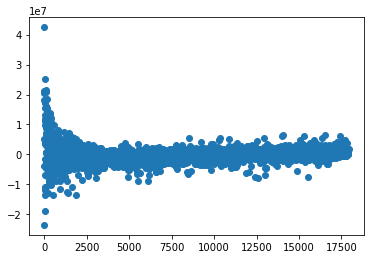

In [25]:
g=plt.plot(y_test - preds,marker='o',linestyle='')

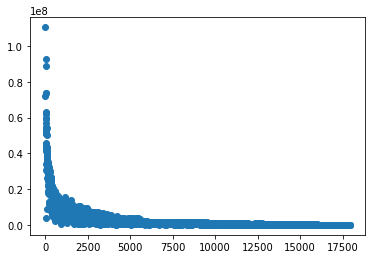

In [26]:
g=plt.plot(y_test,marker='o',linestyle='')

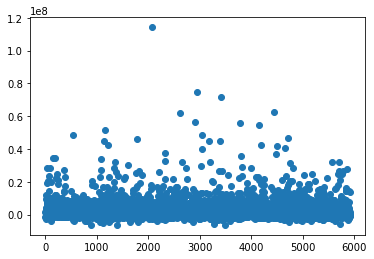

In [27]:
g=plt.plot(preds,marker='o',linestyle='')